<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/PROJECT_PCVK_KEL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import fnmatch
import random
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import imutils
from imutils.contours import sort_contours

# FACE DETECTION

In [ ]:
def facedet(img_asli, cascade_face):
    # Detect faces in the image
    img_facedet = img_asli.copy()
    faces = cascade_face.detectMultiScale(img_facedet, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Initialize crop_face with None
    crop_face = None

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv.rectangle(img_facedet, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Assign value to crop_face
        crop_face = img_asli[y:y+h, x:x+w]

    # Display the original and processed images side by side
    fig, axs = plt.subplots(1, 3, figsize=(16, 8))
    axs[0].imshow(cv.cvtColor(img_asli, cv.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv.cvtColor(img_facedet, cv.COLOR_BGR2RGB))
    axs[1].set_title('Deteksi Wajah')

    # Check if any faces were detected before displaying crop_face
    if crop_face is not None:
        axs[2].imshow(cv.cvtColor(crop_face, cv.COLOR_BGR2RGB))
        axs[2].set_title('Hasil Crop Wajah')
    else:
        axs[2].set_title('No Face Detected')

    plt.show()


In [ ]:
direktori = '/content/drive/MyDrive/pcvk_dataset/Kelompok 3/'

# Fungsi os.listdir() digunakan untuk memuat daftar file dalam direktori,
semua_file = os.listdir(direktori)

# Load the Haar cascade classifier for face detection
cascade_face = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

## Nama : 3D_2141720176 - Aryo Deva Saputra

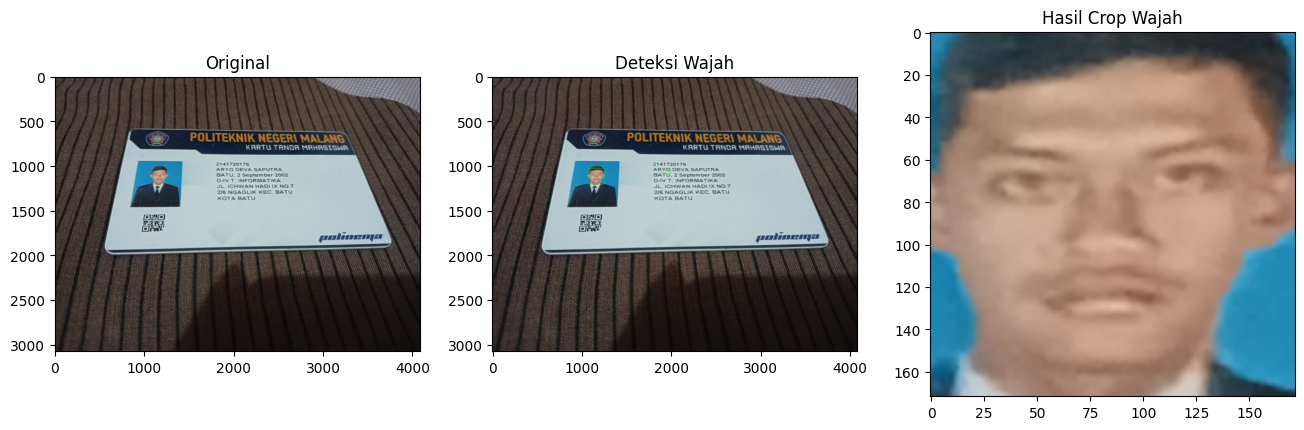

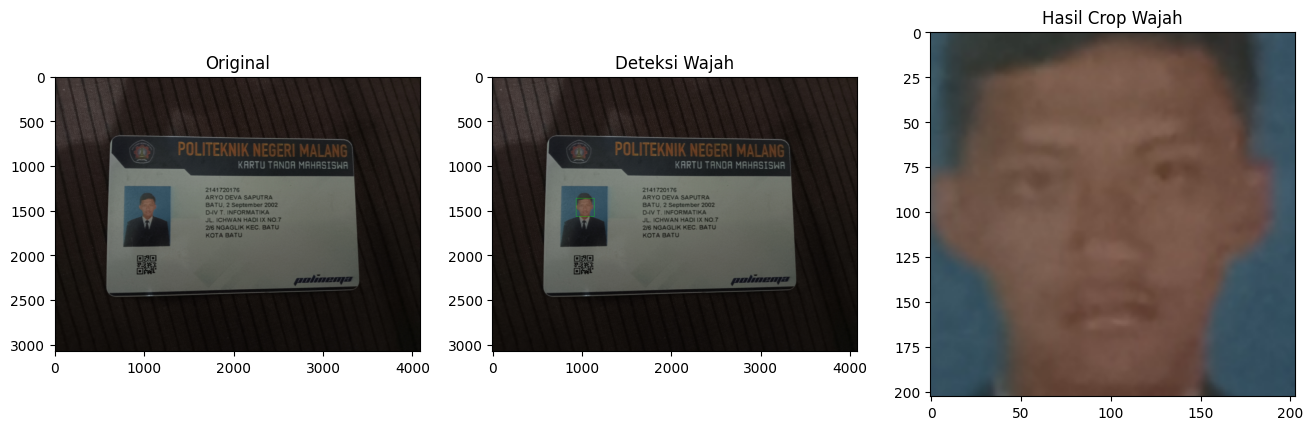

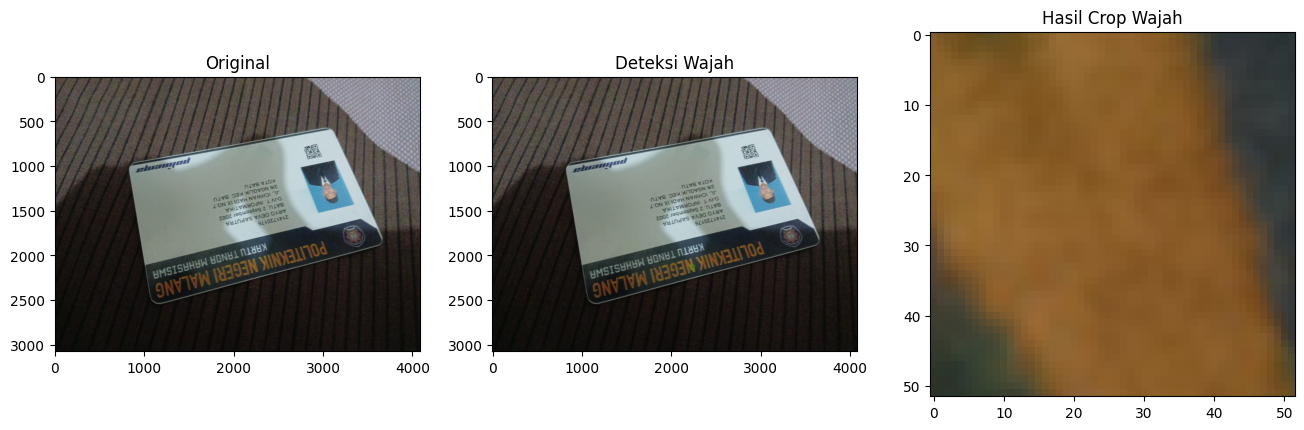

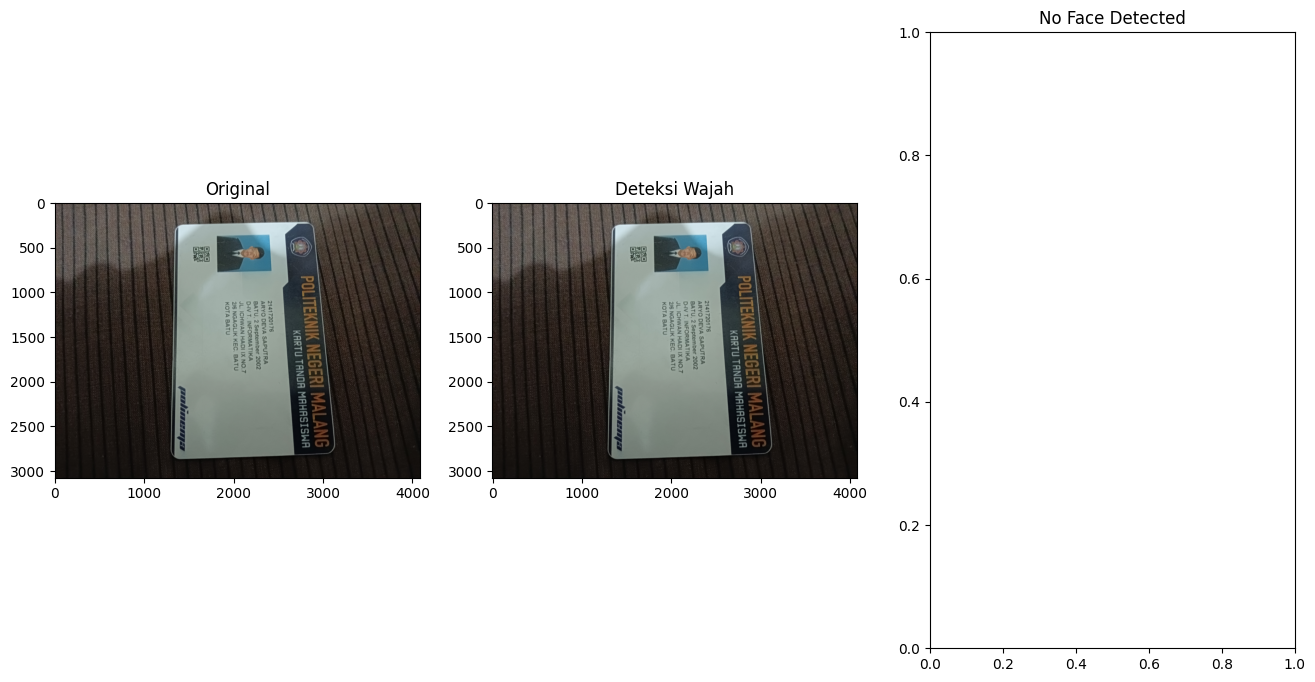

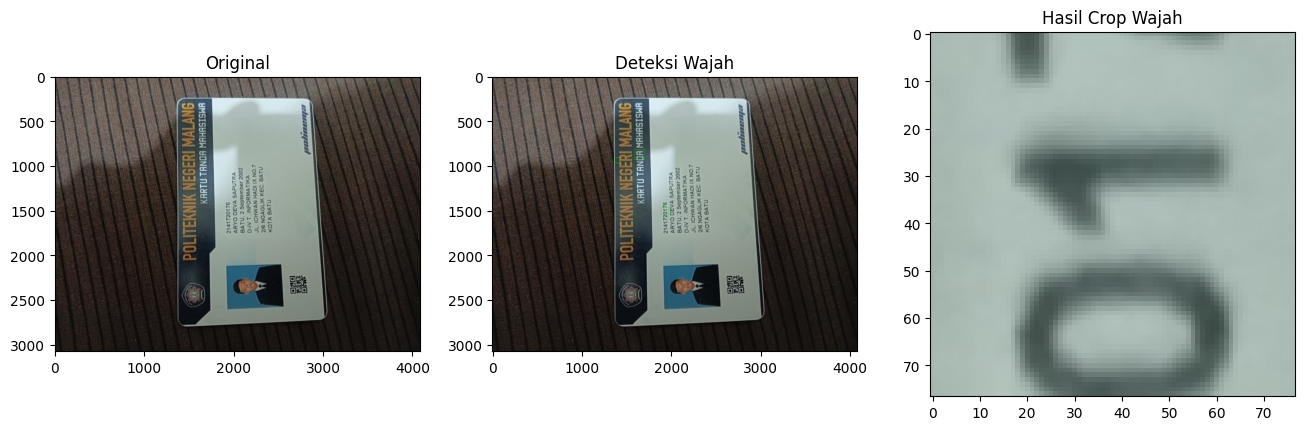

In [ ]:
# Gunakan fnmatch.fnmatchcase() untuk mencocokkan file yang mengandung kata tertentu
image_files = [file for file in semua_file if fnmatch.fnmatchcase(file, f'*3D*')]

# Loop melalui semua file yang memenuhi kondisi
for img_file in image_files:
  img_path = os.path.join(direktori, img_file)
  img = cv.imread(img_path)
  blur = cv.GaussianBlur(img, (3,3), 0)

  # Memanggil fungsi untuk mendeteksi wajah
  facedet(blur, cascade_face)

## Nama : 3E_2141720204 - Devano Abe

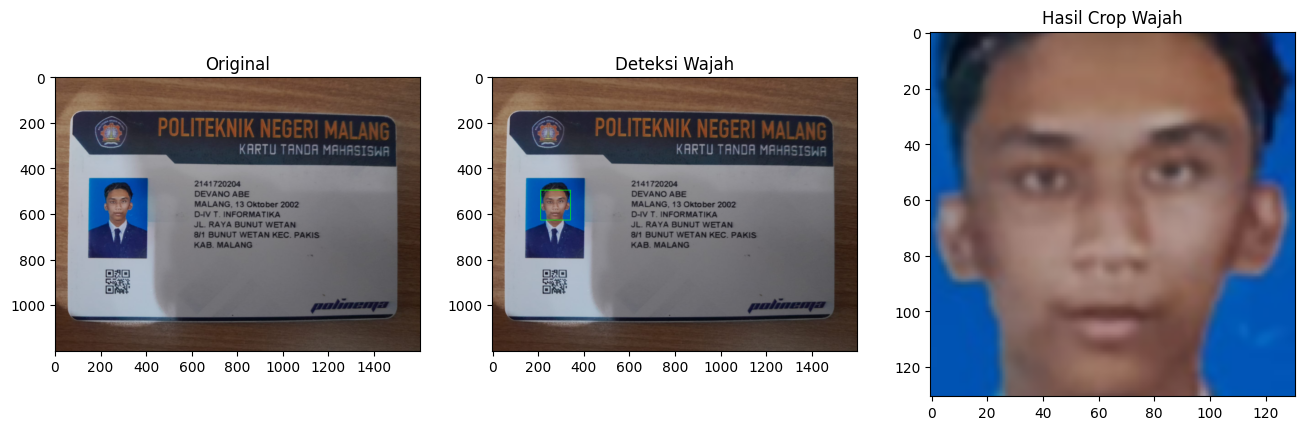

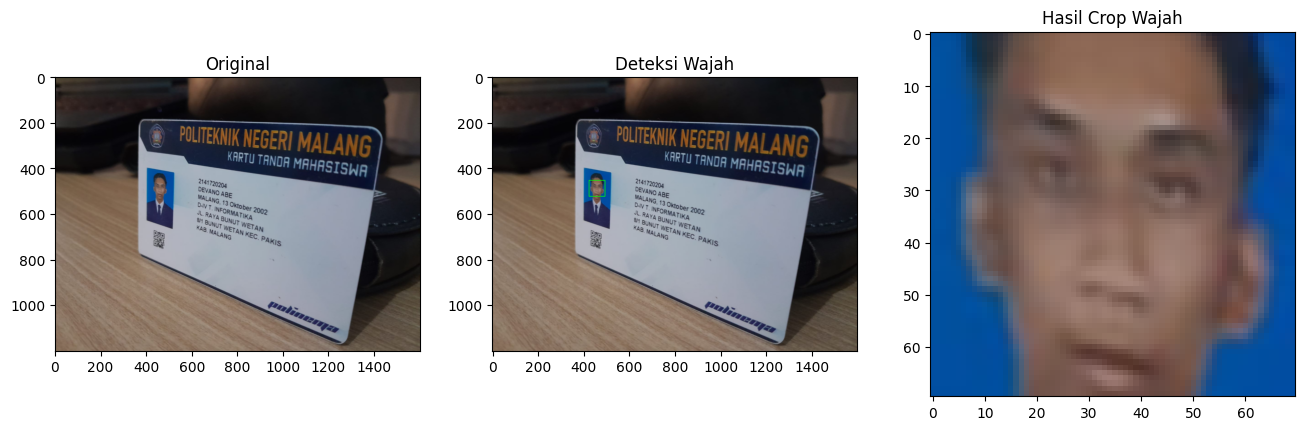

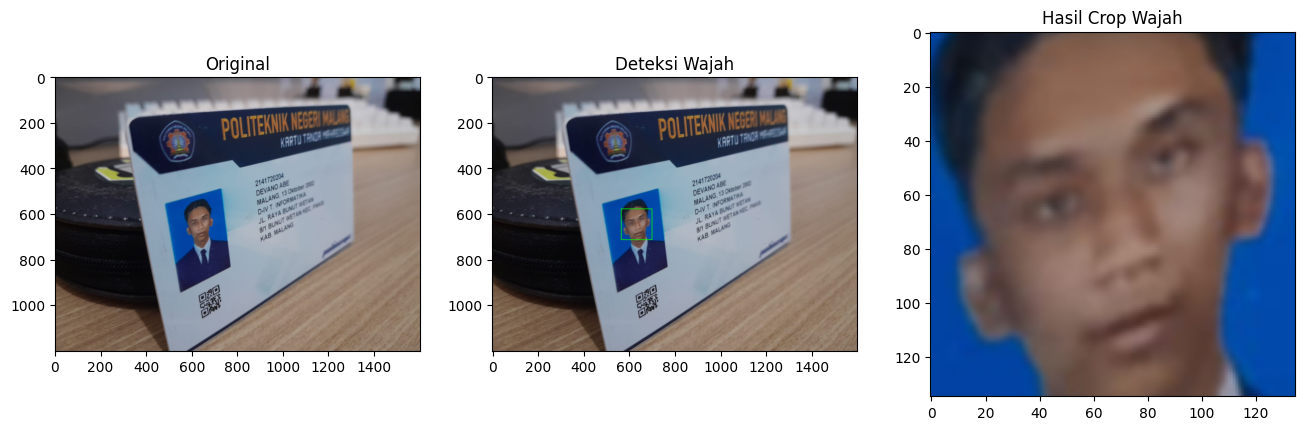

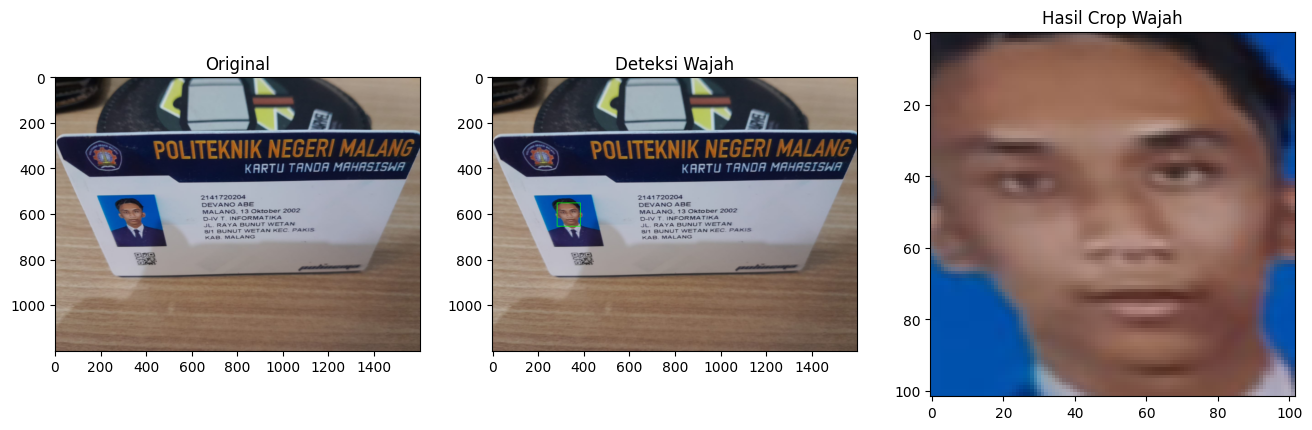

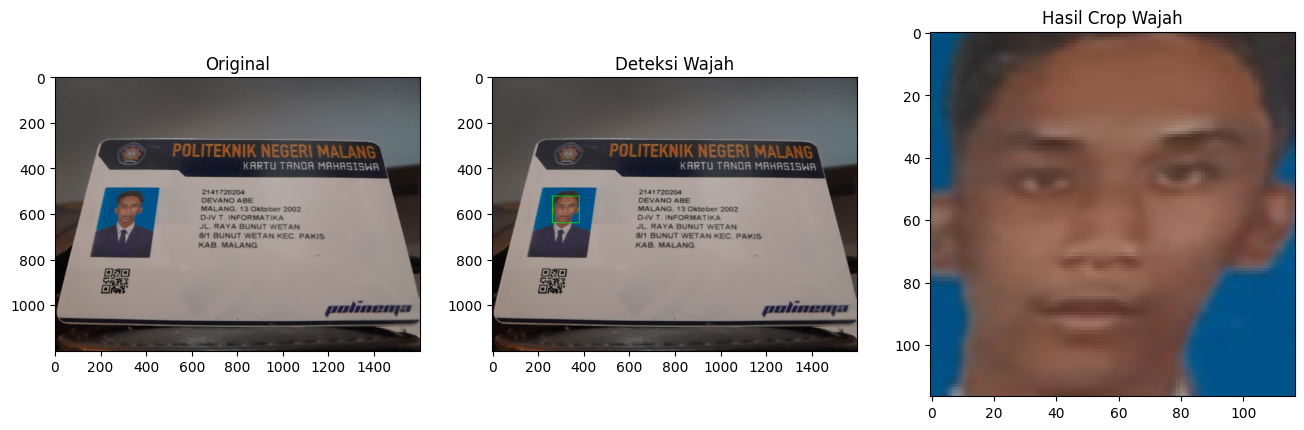

In [ ]:
# Gunakan fnmatch.fnmatchcase() untuk mencocokkan file yang mengandung kata tertentu
image_files = [file for file in semua_file if fnmatch.fnmatchcase(file, f'*3E*')]

# Loop melalui semua file yang memenuhi kondisi
for img_file in image_files:
  img_path = os.path.join(direktori, img_file)
  img = cv.imread(img_path)
  blur = cv.GaussianBlur(img, (3,3), 0)

  # Memanggil fungsi untuk mendeteksi wajah
  facedet(blur, cascade_face)

## 3I_2341729015_1 - Alfi Alawiyah

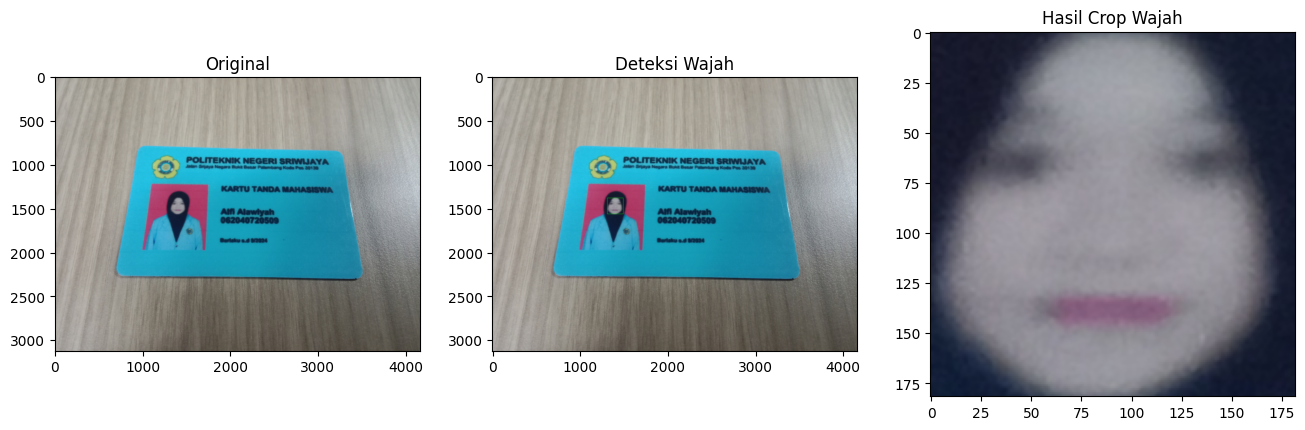

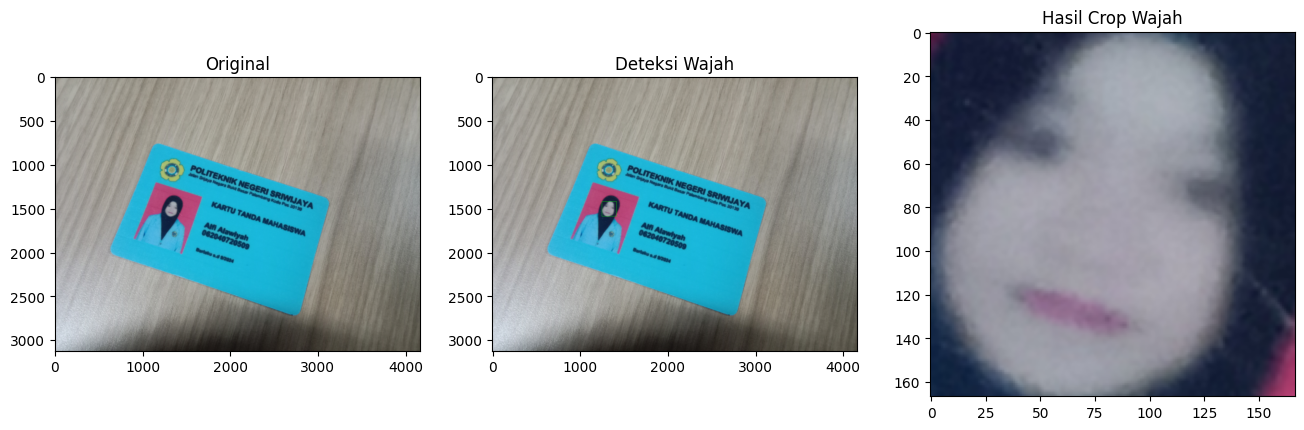

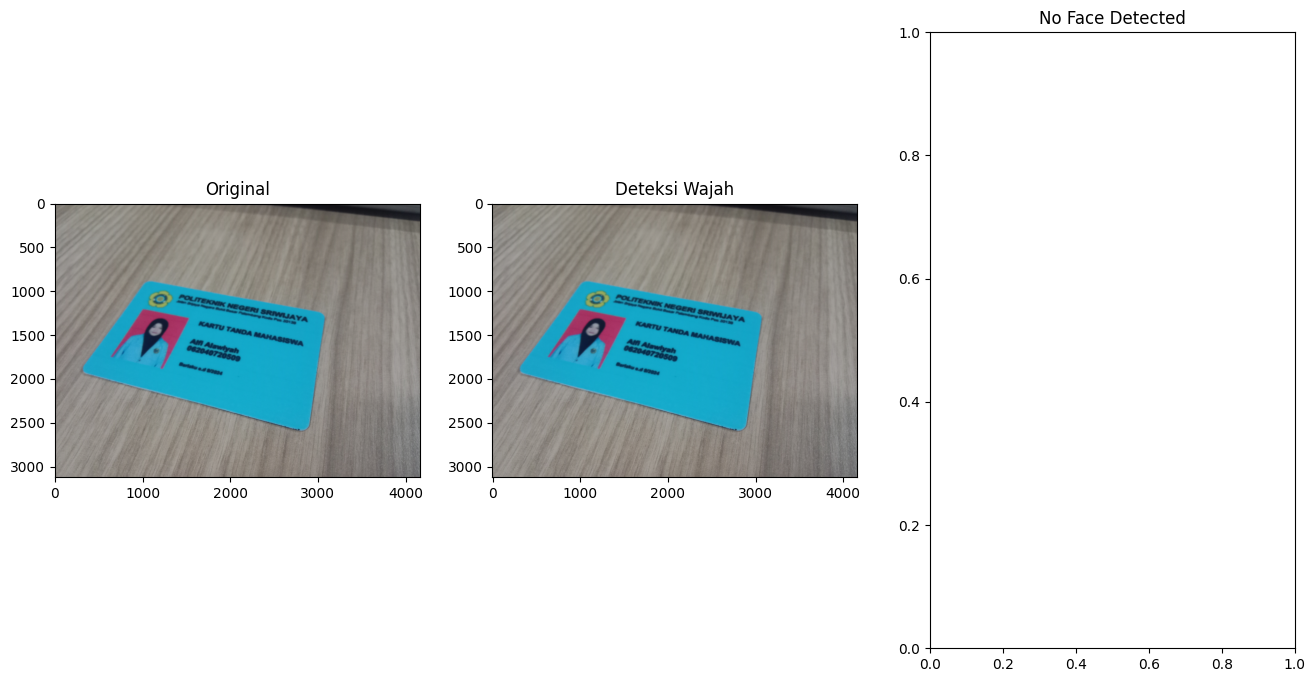

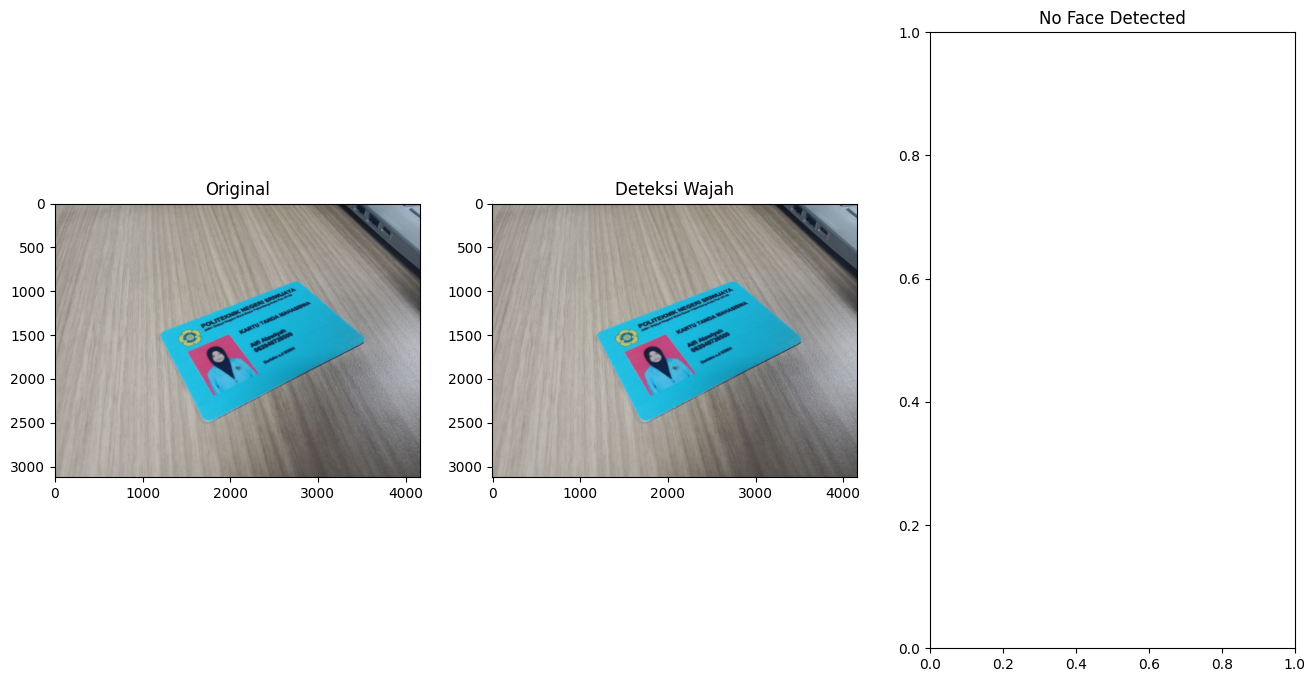

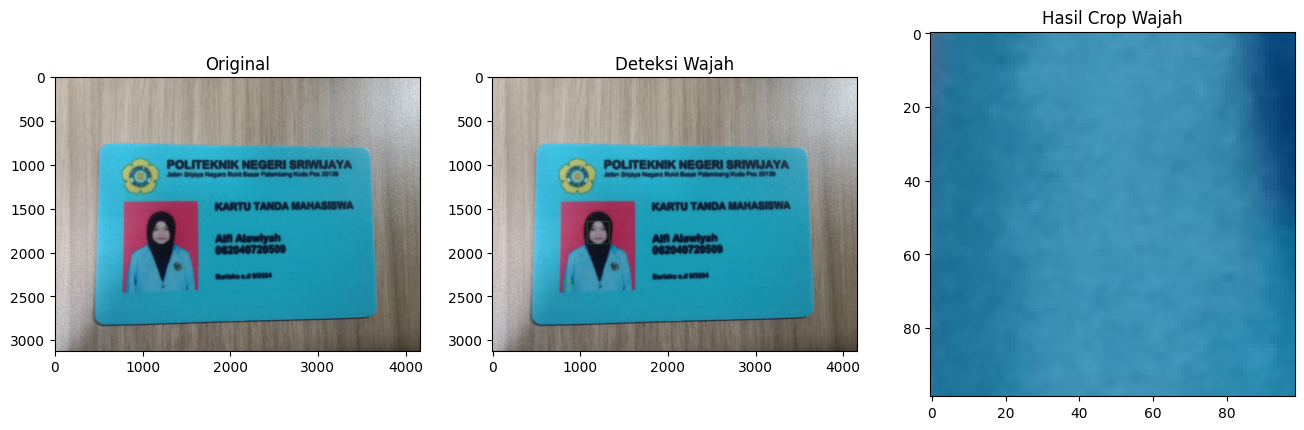

In [ ]:
# Gunakan fnmatch.fnmatchcase() untuk mencocokkan file yang mengandung kata tertentu
image_files = [file for file in semua_file if fnmatch.fnmatchcase(file, f'*23*')]

# Loop melalui semua file yang memenuhi kondisi
for img_file in image_files:
  img_path = os.path.join(direktori, img_file)
  img = cv.imread(img_path)
  blur = cv.GaussianBlur(img, (3,3), 0)

  # Memanggil fungsi untuk mendeteksi wajah
  facedet(blur, cascade_face)

# Pembuatan Model

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile
from tensorflow.keras.datasets import mnist

## Model MNIST untuk Angka

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# Check shape data
(train_data.shape, test_data.shape)
# Check shape labels
(train_labels.shape, test_labels.shape)
# Check each data shape --> should be 28*28
train_data[0].shape
# Check the label
train_labels.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000,)

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])
# Check data shape
digits_data.shape
# Check label shape
digits_labels.shape

(70000,)

## Alfabet

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-17 11:14:32--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   241MB/s    in 0.8s    

2023-12-17 11:14:33 (241 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('/content/drive/MyDrive/PCVK/Kelompok_3/')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('/content/drive/MyDrive/PCVK/Kelompok_3/A_Z Handwritten Data/A_Z Handwritten Data.csv').astype('float32')
dataset_az

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
372445    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372446    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372447    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372448    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372449    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[372450 rows x 785 columns]

In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

## Kombinasi MNIST DAN KANGEL A-Z

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

## Preposesing data set


In [ ]:
# Normalize data
data /= 255.0

# Check range value of data
data[0].min(), data[0].max()

# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

# Check labels shape
labels.shape

(442450, 36)

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# SPLIT DATA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
char_list = '0123456789'
char_list += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_list = [l for l in char_list]

# Check actual label
print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
import joblib

joblib.dump(char_list, '/content/drive/MyDrive/PCVK/Kelompok_3/labels.pkl')

['/content/drive/MyDrive/PCVK/Kelompok_3/labels.pkl']

In [ ]:
a = joblib.load("/content/drive/MyDrive/PCVK/Kelompok_3/labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = '/content/drive/MyDrive/PCVK/Kelompok_3/custom_ocr.model'
epochs = 10
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/10
2764/2765 [============================>.] - ETA: 0s - loss: 2.2420 - accuracy: 0.8218
Epoch 1: val_loss improved from inf to 0.28998, saving model to /content/drive/MyDrive/PCVK/Kelompok_3/custom_ocr.model
2765/2765 [==============================] - 138s 48ms/step - loss: 2.2417 - accuracy: 0.8218 - val_loss: 0.2900 - val_accuracy: 0.8966
Epoch 2/10
2764/2765 [============================>.] - ETA: 0s - loss: 0.9969 - accuracy: 0.8994
Epoch 2: val_loss improved from 0.28998 to 0.21169, saving model to /content/drive/MyDrive/PCVK/Kelompok_3/custom_ocr.model
2765/2765 [==============================] - 129s 47ms/step - loss: 0.9969 - accuracy: 0.8994 - val_loss: 0.2117 - val_accuracy: 0.9198
Epoch 3/10
2764/2765 [============================>.] - ETA: 0s - loss: 0.8155 - accuracy: 0.9132
Epoch 3: val_loss improved from 0.21169 to 0.19751, saving model to /content/drive/MyDrive/PCVK/Kelompok_3/custom_ocr.model
2765/2765 [==============================] - 129s 47ms/step - loss

In [ ]:
# The result will show in colab directory
network.save('/content/drive/MyDrive/PCVK/Kelompok_3/network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import library
from tensorflow.keras.models import load_model
# Load saved network
load_network = load_model('/content/drive/MyDrive/PCVK/Kelompok_3/network')
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

## Evaluasi Model

In [ ]:
# make a prediction
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([1.66199541e-07, 5.28082538e-08, 1.71158973e-07, 1.92581024e-06,
       4.35049843e-11, 2.37697717e-02, 1.02466663e-06, 4.40129844e-09,
       1.61293173e-07, 1.13390183e-06, 1.02204887e-12, 7.38632444e-09,
       2.55420058e-08, 3.20336753e-08, 1.03483453e-08, 7.32030131e-11,
       1.27028557e-04, 1.75192461e-13, 3.34163086e-10, 1.63445693e-05,
       3.50647369e-08, 6.26168060e-08, 5.77987907e-14, 2.70979683e-10,
       9.55767163e-08, 7.37316768e-08, 3.66859005e-08, 6.23674792e-11,
       9.76081789e-01, 3.46924467e-09, 1.79238888e-10, 4.21080315e-12,
       2.83130824e-10, 4.46029363e-13, 1.06684706e-08, 5.28861488e-09],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])

28

In [ ]:
# Check label for 24
name_labels[28]

NameError: ignored

## Evaluasi  test data

In [ ]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.2175 - accuracy: 0.9062


[0.2175026834011078, 0.9062153697013855]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

NameError: ignored

# Preprocessing

## Fungsi

In [ ]:
def proses(img) :
  # PREPROCESSING
  h, w = img.shape[:2]  # Grayscale images have only two dimensions (height, width)
  c = 1  # Grayscale image has only one channel

  data = img / 255.0  # Mengubah piksel menjadi rentang 0 hingga 1
  data = data.reshape(h * w, c)  #


  # Buat label atau data target sesuai kebutuhan
  color_avg = np.mean(data, axis=1)
  labels = np.array([0 if avg < 0.25 else 1 for avg in color_avg])

  # Proses segmentasi dengan Random Forest
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)  # Buat model Random Forest
  rf_classifier.fit(data, labels)  # Melatih model dengan data dan label
  predict = rf_classifier.predict(data)  # Prediksi dengan model yang sudah dilatih
  predict = predict.reshape((h, w))

  # Convert predict to uint8
  predict = predict.astype(np.uint8)

  return predict

In [ ]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv.BORDER_CONSTANT, value=(0,0,0))
  filled = cv.resize(filled, (28,28))

  return filled

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
def process_box(img, x, y, w, h):

  roi = extract_roi(img)
  (h, w) = roi.shape
  resized = resize_img(roi, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
def thresholding(image, threshold_value):
    # Melakukan operasi thresholding manual pada gambar.

    thresholded_image = np.zeros_like(image)
    thresholded_image[image > threshold_value] = 255
    return thresholded_image

## Devano

In [ ]:

img1 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')
# Merubah Ke Gray
img = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# Tentukan nilai ambang (contoh: 127)
th = 70

# Terapkan threshold
thresholded_image = thresholding(img, th)


Text(0.5, 1.0, 'Hasil Dua Warna')

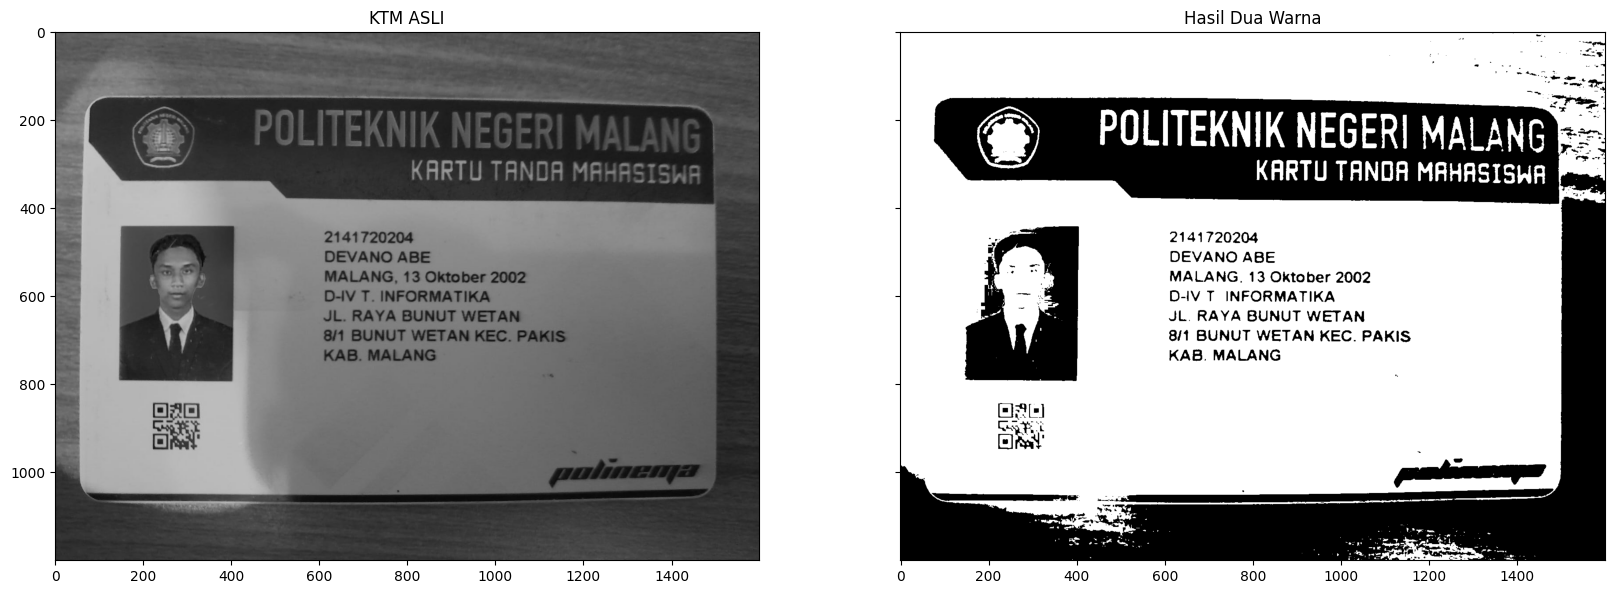

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Hasil Dua Warna')



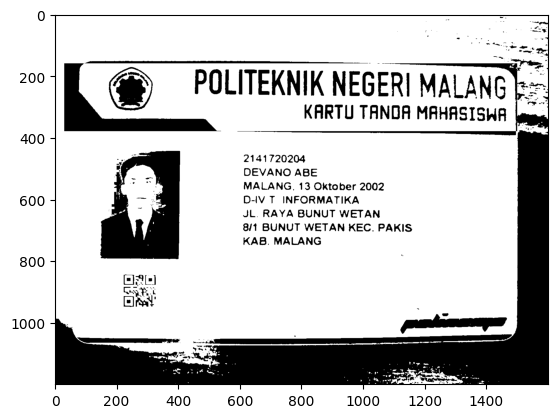

In [ ]:
openn = cv.morphologyEx(thresholded_image,cv.MORPH_OPEN,(5,5))

kernel = np.ones((5,5),np.uint8)
roi_mask = np.zeros_like(openn, dtype=np.uint8)
roi_mask[160:380, 30:1500] = 1

invertion = 255 - openn
# Combine the opened region back to the original image
result = openn.copy()
result[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result,cmap='gray')

In [ ]:
hasil = 255 - result

contours, hierarchy = cv.findContours(hasil, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 140
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan = hasil[y:y+h, x:x+w]
        potongan_kontur.append(potongan)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

Text(0.5, 1.0, 'Hasil Kontur')

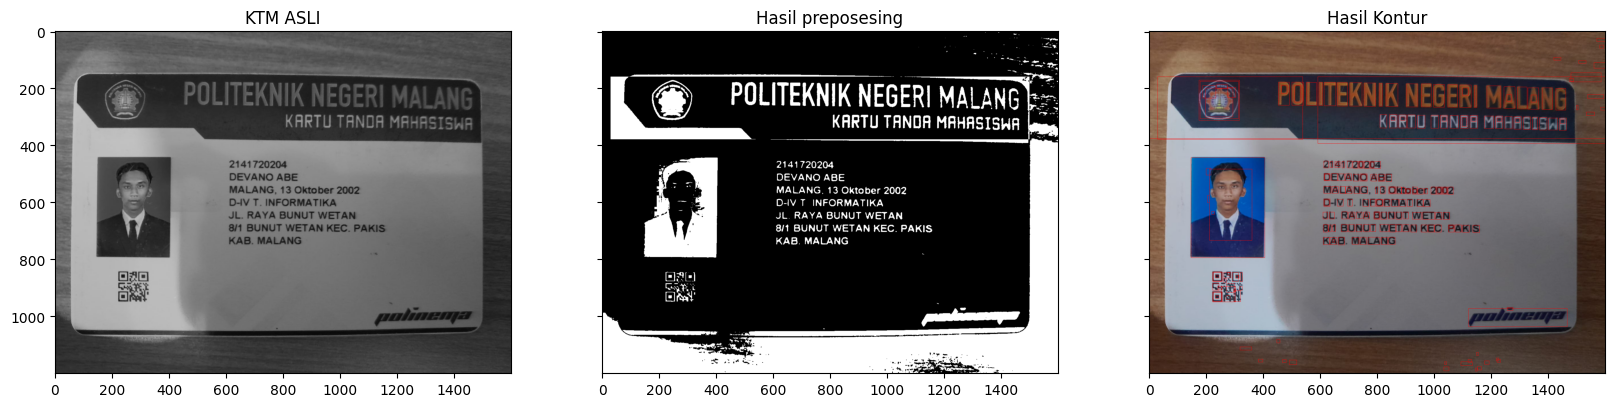

In [ ]:
img_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(hasil, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb)
axs[2].set_title('Hasil Kontur')

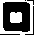

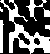

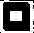

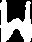

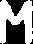

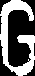

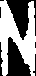

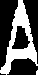

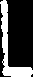

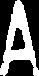

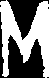

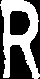

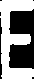

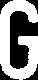

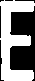

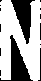

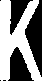

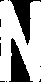

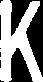

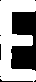

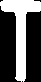

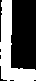

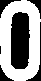

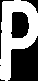

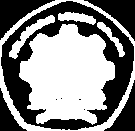

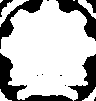

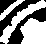

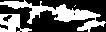

In [ ]:
for i, potongan in enumerate(potongan_kontur):
  cv2_imshow(potongan)


In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 140
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(hasil, x, y, w, h))

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(169, 28, 28, 1)

## Devano2

In [ ]:

img12 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_2 - Devano Abe.jpeg')
# Merubah Ke Gray
img = cv.cvtColor(img12, cv.COLOR_BGR2GRAY)

# Tentukan nilai ambang (contoh: 127)
th = 70

# Terapkan threshold
thresholded_image = thresholding(img, th)


Text(0.5, 1.0, 'Hasil Dua Warna')

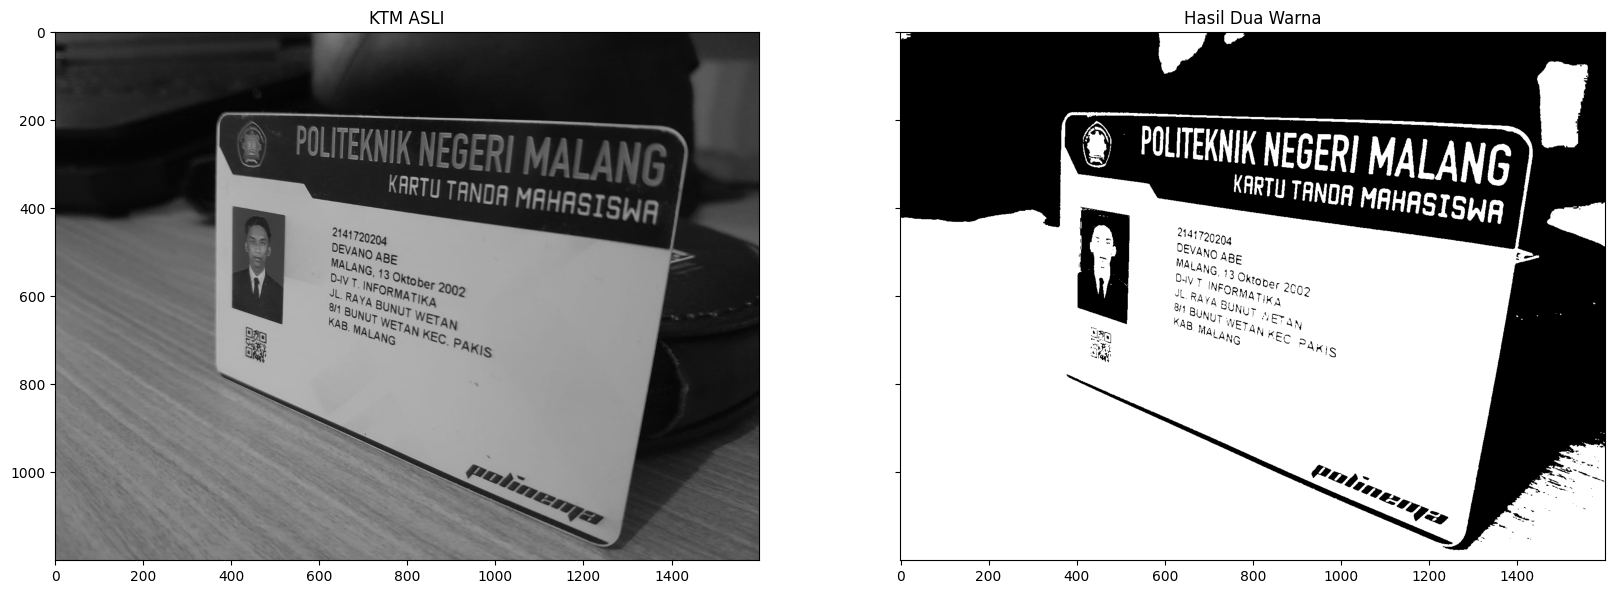

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Hasil Dua Warna')



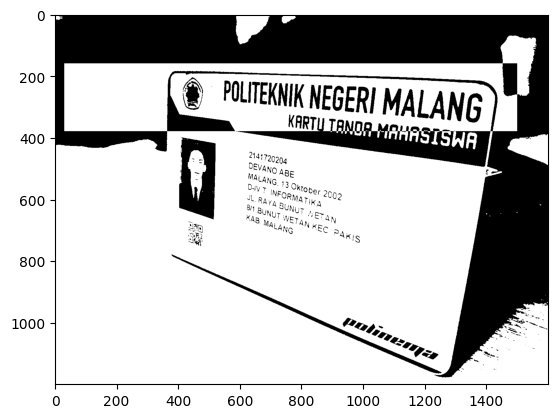

In [ ]:
openn = cv.morphologyEx(thresholded_image,cv.MORPH_OPEN,(5,5))

kernel = np.ones((5,5),np.uint8)
roi_mask = np.zeros_like(openn, dtype=np.uint8)
roi_mask[160:380, 30:1500] = 1

invertion = 255 - openn
# Combine the opened region back to the original image
result = openn.copy()
result[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result,cmap='gray')

In [ ]:
hasil = 255 - result

contours, hierarchy = cv.findContours(hasil, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 140
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan = hasil[y:y+h, x:x+w]
        potongan_kontur.append(potongan)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img12, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

Text(0.5, 1.0, 'Hasil Kontur')

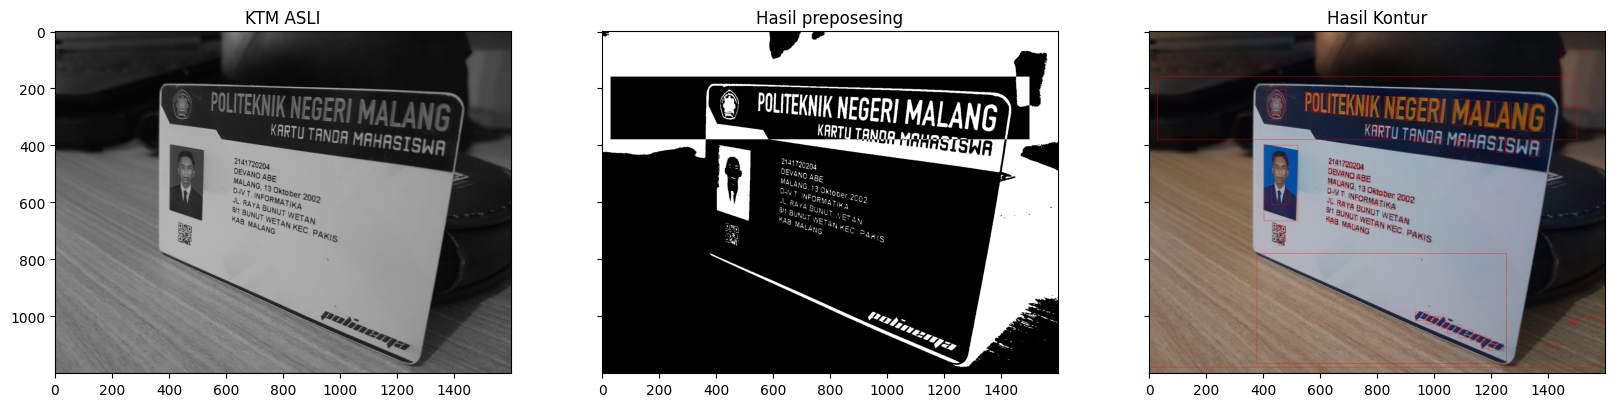

In [ ]:
img_rgb = cv.cvtColor(img12, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(hasil, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb)
axs[2].set_title('Hasil Kontur')

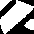

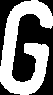

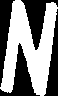

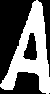

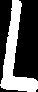

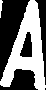

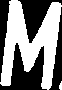

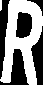

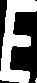

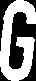

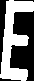

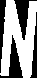

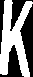

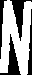

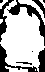

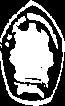

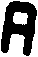

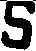

In [ ]:
for i, potongan in enumerate(potongan_kontur):
  cv2_imshow(potongan)


In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 140
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(hasil, x, y, w, h))

In [ ]:
# Get all char pixel
pixels12 = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes12 = [box[1] for box in detected_char]

In [ ]:
pixels12.shape

(145, 28, 28, 1)

## Devano3

In [ ]:

img13 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_3 - Devano Abe.jpeg')
# Merubah Ke Gray
img = cv.cvtColor(img13, cv.COLOR_BGR2GRAY)

# Tentukan nilai ambang (contoh: 127)
th = 70

# Terapkan threshold
thresholded_image = thresholding(img, th)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Hasil Dua Warna')



Text(0.5, 1.0, 'Hasil Dua Warna')

In [ ]:
openn = cv.morphologyEx(thresholded_image,cv.MORPH_OPEN,(5,5))

kernel = np.ones((5,5),np.uint8)
roi_mask = np.zeros_like(openn, dtype=np.uint8)
roi_mask[160:380, 30:1500] = 1

invertion = 255 - openn
# Combine the opened region back to the original image
result = openn.copy()
result[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result,cmap='gray')

In [ ]:
hasil = 255 - result

contours, hierarchy = cv.findContours(hasil, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 140
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan = hasil[y:y+h, x:x+w]
        potongan_kontur.append(potongan)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img13, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

In [ ]:
img_rgb = cv.cvtColor(img13, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(hasil, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb)
axs[2].set_title('Hasil Kontur')

In [ ]:
for i, potongan in enumerate(potongan_kontur):
  cv2_imshow(potongan)


In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 140
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(hasil, x, y, w, h))

In [ ]:
# Get all char pixel
pixels13 = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes13 = [box[1] for box in detected_char]

In [ ]:
pixels13.shape

## Devano4

In [ ]:

img14 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_4 - Devano Abe.jpeg')
# Merubah Ke Gray
img = cv.cvtColor(img14, cv.COLOR_BGR2GRAY)

# Tentukan nilai ambang (contoh: 127)
th = 70

# Terapkan threshold
thresholded_image = thresholding(img, th)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Hasil Dua Warna')



In [ ]:
openn = cv.morphologyEx(thresholded_image,cv.MORPH_OPEN,(5,5))

kernel = np.ones((5,5),np.uint8)
roi_mask = np.zeros_like(openn, dtype=np.uint8)
roi_mask[160:380, 30:1500] = 1

invertion = 255 - openn
# Combine the opened region back to the original image
result = openn.copy()
result[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result,cmap='gray')

In [ ]:
hasil = 255 - result

contours, hierarchy = cv.findContours(hasil, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 140
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan = hasil[y:y+h, x:x+w]
        potongan_kontur.append(potongan)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img14, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

In [ ]:
img_rgb = cv.cvtColor(img14, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(hasil, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb)
axs[2].set_title('Hasil Kontur')

In [ ]:
for i, potongan in enumerate(potongan_kontur):
  cv2_imshow(potongan)


In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 140
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(hasil, x, y, w, h))

In [ ]:
# Get all char pixel
pixels14 = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes14 = [box[1] for box in detected_char]

In [ ]:
pixels14.shape

## Devano5

In [ ]:

img15 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_5 - Devano Abe.jpeg')
# Merubah Ke Gray
img = cv.cvtColor(img15, cv.COLOR_BGR2GRAY)

# Tentukan nilai ambang (contoh: 127)
th = 70

# Terapkan threshold
thresholded_image = thresholding(img, th)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(thresholded_image, cmap='gray')
axs[1].set_title('Hasil Dua Warna')



In [ ]:
openn = cv.morphologyEx(thresholded_image,cv.MORPH_OPEN,(5,5))

kernel = np.ones((5,5),np.uint8)
roi_mask = np.zeros_like(openn, dtype=np.uint8)
roi_mask[160:380, 30:1500] = 1

invertion = 255 - openn
# Combine the opened region back to the original image
result = openn.copy()
result[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result,cmap='gray')

In [ ]:
hasil = 255 - result

contours, hierarchy = cv.findContours(hasil, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 140
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan = hasil[y:y+h, x:x+w]
        potongan_kontur.append(potongan)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img15, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

In [ ]:
img_rgb = cv.cvtColor(img15, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(hasil, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb)
axs[2].set_title('Hasil Kontur')

In [ ]:
for i, potongan in enumerate(potongan_kontur):
  cv2_imshow(potongan)


In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 140
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(hasil, x, y, w, h))

In [ ]:
# Get all char pixel
pixels15 = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes15 = [box[1] for box in detected_char]

In [ ]:
pixels15.shape

## Alfi

In [ ]:

img2 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3I_2341729015_1 - Alfi Alawiyah.jpg')
# Tentukan koordinat sudut kiri atas dan kanan bawah untuk rectangular region yang ingin Anda potong
x1, y1 = 490, 750  # Koordinat sudut kiri atas
x2, y2 = 3600, 2700  # Koordinat sudut kanan bawah
img_crop2 = img2[y1:y2, x1:x2]
img_asli2 = img_crop2.copy()

img2_gray = cv.cvtColor(img_crop2, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img2_gray, (3,3), 0)

In [ ]:
plt.imshow(blur,cmap='gray')

In [ ]:
# Tentukan nilai ambang (contoh: 127)
threshold_value = 70

# Terapkan threshold
_, thresholded_image = cv.threshold(img2_gray, threshold_value, 255, cv.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')

In [ ]:

invertion = 255 - thresholded_image
# check

kernel = np.ones((5, 5), np.uint8)
erode = cv.erode(invertion, kernel, iterations=1)
kernel = np.ones((5, 5), np.uint8)
erode = cv.erode(erode, kernel, iterations=1)


# kernel = np.ones((5,5),np.uint8)
# openn = cv.morphologyEx(erode,cv.MORPH_OPEN, kernel)
plt.imshow(erode, cmap='gray')

In [ ]:
contours, hierarchy = cv.findContours(erode, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts2 = sort_contours(contours, method='left-to-right')[0]
potongan_kontur2 = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 160
      min_h, max_h = 14, 140

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan2 = erode[y:y+h, x:x+w]
        potongan_kontur2.append(potongan2)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img_crop2, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

In [ ]:
img_rgb2 = cv.cvtColor(img_crop2, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img_crop2, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(erode, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb2)
axs[2].set_title('Hasil Kontur')

In [ ]:
for i, potongan2 in enumerate(potongan_kontur2):
  cv2_imshow(potongan2)


In [ ]:
# Detect every single char from contour
detected_char2 = []

for c in conts2:
  (x, y, w, h ) = cv.boundingRect(c)

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char2.append(process_box(erode, x, y, w, h))

In [ ]:
# Get all char pixel
pixels2 = np.array([px[0] for px in detected_char2], dtype='float32')

# Get all box for detected char
boxes2 = [box[1] for box in detected_char2]

## Aryo Deva

In [ ]:
from sklearn.ensemble import RandomForestClassifier


img3 = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')
# Tentukan koordinat sudut kiri atas dan kanan bawah untuk rectangular region yang ingin Anda potong
x1, y1 = 500, 600  # Koordinat sudut kiri atas
x2, y2 = 3500, 2400  # Koordinat sudut kanan bawah
img_crop3 = img3[y1:y2, x1:x2]
img_asli = img_crop3.copy()
img3_gray = cv.cvtColor(img_crop3, cv.COLOR_BGR2GRAY)
plt.imshow(img3_gray,cmap='gray')

In [ ]:
# Tentukan nilai ambang (contoh: 127)
th = 65

# Terapkan threshold
thresholded_image = thresholding(img3_gray, th)

# predict3 = proses(img3_gray)
plt.imshow(thresholded_image, cmap='gray')

In [ ]:
roi_mask = np.zeros_like(thresholded_image, dtype=np.uint8)
# Menentukan batas koordinat
x1 = 50  # Batas awal sumbu x
x2 = 480  # Batas akhir sumbu x
y1 = 50  # Batas awal sumbu y
y2 = 2900  # Batas akhir sumbu y

# Membuat variabel roi_mask
roi_mask[x1:x2, y1:y2] = 1

kernel = np.ones((5,5),np.uint16)
dilasi = cv.dilate(thresholded_image * roi_mask,kernel,iterations = 1)
invertion = 255 - dilasi

# Combine the opened region back to the original image
result3 = thresholded_image.copy()
result3[roi_mask > 0] = invertion[roi_mask > 0]

plt.imshow(result3,cmap='gray')

In [ ]:
invertion2 = 255 - result3
kernel = np.ones((3,3),np.uint16)
dilasi = cv.dilate(invertion2,kernel,iterations = 1)
# img_rgb3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img_crop3, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(dilasi, cmap='gray')
axs[1].set_title('Hasil preposesing')

In [ ]:
contours, hierarchy = cv.findContours(dilasi, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# conts = imutils.grab_contours(contours)
conts = sort_contours(contours, method='left-to-right')[0]
potongan_kontur3 = []

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      # Menyimpan potongan kontur ke dalam array
      min_w, max_w = 10, 120
      min_h, max_h = 14, 200

      if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        potongan3 = dilasi[y:y+h, x:x+w]
        potongan_kontur3.append(potongan3)

      # Menggambar kotak pada gambar asli
      cv.rectangle(img_crop3, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

In [ ]:
img_rgb3 = cv.cvtColor(img_crop3, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
axs[0].imshow(cv.cvtColor(img_asli, cv.COLOR_BGR2RGB))
axs[0].set_title('KTM ASLI')
axs[1].imshow(dilasi, cmap='gray')
axs[1].set_title('Hasil preposesing')
axs[2].imshow(img_rgb3)
axs[2].set_title('Hasil Kontur')

In [ ]:
for i, potongan3 in enumerate(potongan_kontur3):
    cv2_imshow(potongan3)

In [ ]:
# Detect every single char from contour
detected_char3 = []

for c in conts:
  (x, y, w, h ) = cv.boundingRect(c)

  # Menyimpan potongan kontur ke dalam array
  min_w, max_w = 10, 120
  min_h, max_h = 14, 200

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char3.append(process_box(dilasi, x, y, w, h))

In [ ]:
# Get all char pixel
pixels3 = np.array([px[0] for px in detected_char3], dtype='float32')

# Get all box for detected char
boxes3 = [box[1] for box in detected_char3]

# OCR

## DEVANO

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# Show char with actual image
img_hasil = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')

for(pred, (x, y, w, h)) in zip(prediction, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img_hasil, char_detected, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

cv2_imshow(img_hasil)

## DEVANO2

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels12)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# # Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')

for(pred, (x, y, w, h)) in zip(prediction, boxes12):
  i = np.argmax(pred)
  char_detected12 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img12, char_detected12, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

cv2_imshow(img12)

## DEVANO3

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels13)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# # Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')

for(pred, (x, y, w, h)) in zip(prediction, boxes13):
  i = np.argmax(pred)
  char_detected13 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img13, char_detected13, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

cv2_imshow(img13)

## DEVANO4

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels14)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# # Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')

for(pred, (x, y, w, h)) in zip(prediction, boxes14):
  i = np.argmax(pred)
  char_detected14 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img14, char_detected14, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

cv2_imshow(img14)

## DEVANO5

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels15)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# # Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/pcvk_dataset/Kelompok 3/3E_2141720204_1 - Devano Abe.jpeg')

for(pred, (x, y, w, h)) in zip(prediction, boxes15):
  i = np.argmax(pred)
  char_detected15 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img15, char_detected15, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)

cv2_imshow(img15)

## Alfi

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels2)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/PCVK/Kelompok_3/3D_2141720176_1 - Aryo Deva Saputra.jpg')

for(pred, (x, y, w, h)) in zip(prediction, boxes2):
  i = np.argmax(pred)
  char_detected2 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img_asli2, char_detected2, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_asli2)

## Aryo

In [ ]:
# Make a predition dengan potongan

prediction = load_network.predict(pixels3)

prediction.shape

In [ ]:
# Char Prediction
for p in prediction:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

In [ ]:
# Show char with actual image
# img_hasil = cv.imread('/content/drive/MyDrive/PCVK/Kelompok_3/3D_2141720176_1 - Aryo Deva Saputra.jpg')

for(pred, (x, y, w, h)) in zip(prediction, boxes3):
  i = np.argmax(pred)
  char_detected3 = char_list[i]

  # cv.rectangle(img_hasil, (x, y), (x+w, y+h), (255,0,0), 2)
  cv.putText(img_asli, char_detected3, (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)

cv2_imshow(img_asli)